# Introdução às Redes Neurais (Dia 02) Picture1.jpg

---
## Introdução (Exemplo 2)

**Objetivo:** resolver o mesmo problema de classificação de um dígito manuscrito, porém usando o Keras.

Mas, o que é o Keras? Segundo sua própria definição é:

"A `tf.keras` é a API de alto nível do TensorFlow para criar e treinar modelos de aprendizado profundo. Ela é usada para prototipagem rápida, pesquisa de ponta e produção, com três principais vantagens:

* Fácil de usar:
A Keras tem uma interface simples e consistente otimizada para os casos de uso comuns. Ela fornece feedback claro e prático para os erros do usuário.
* Os modelos modulares e compostos:
da Keras são feitos conectando elementos configuráveis, com poucas restrições.
* Fácil de estender:
Desenvolva elementos personalizados que expressem novas ideias para pesquisa. Crie novas camadas, métricas e funções de perda e desenvolva modelos de última geração."

No site do Keras/Tensorflow é possível encontrar vários exemplos de problemas resolvidos: https://www.tensorflow.org/guide/keras?hl=pt-br.

---
Começamos da mesma forma, importando as bibliotecas necessárias para o trabalho. Perceba que além do `numpy` estamos importando métodos do `Keras`, `scikit-learn` e `seaborn`.

In [ ]:
# importa o necessário
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist #enorme banco de dados de digitos manuscritos
from sklearn.metrics import confusion_matrix # outra api de ml em python
import seaborn as sns # biblioteca para visualizacao estatistica no python

---
No `Keras` os dados do MNIST já estão presentes, então carregamos eles diretamente.

In [ ]:
# carregar o banco de dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


---
Vamos dar uma analisada nos dados.

In [ ]:
# imprime o formato das matrizes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Note que os dados de treino e teste já estão separados. Além disso, temos um conjunto bem maior de informação. São 70 mil imagens ao total.

Outra informação relevante é que aqui as matrizes das imagens não estão empilhadas. Elas estão no seu formato original $28\times 28$.

---

Aqui vamos apenas visualizar os dígitos manuscritos que estão presentes no conjunto de dados. É esperado que vamos ver figuras semelhantes aquelas que vimos anteriormente.

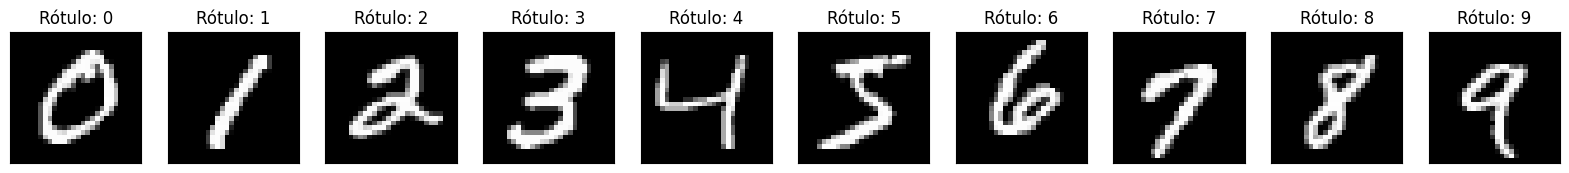

In [ ]:
# Vamos visualizar um exemplo para cada dígito usando um loop for e um subplot matplotlib
num_classes = 10

# Cria um subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 linha, 10 colunas (num_classes)

# Loop através de 10 classes do dataset de treinamento e adiciona um label pra cada dataset de teste
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Rótulo: {i}")
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

---
O `Keras` já possui um método que é capaz de transformar a informação numérica dos rótulos para o formato categórico.

In [ ]:
# Converte y_train no formato categórico
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

# Converte y_test no formato categórico
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

# Mostra como a forma do y_train e y_test mudou
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


---
Vamos conferir agora se os dados precisam de alguma normalização.

In [ ]:
# observem que os dados são matrizes 28x28 com valores inteiros entre 0 e 255
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

---
Precisa sim! Vamos fazê-la abaixo.

In [ ]:
# normaliza as imagens
X_train = X_train/255
X_test = X_test/255

---
Finalmente, vamos utilizar a estrutura do `Keras` para construir a rede neural. Essa construção é através do método `Sequential()`. A partir da construção do modelo podemos adicionar as camadas que comporão a rede neural.

In [ ]:
# cria a rede
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # flatten serve para transformar a figura no seu formato original em um vetor empilhado
model.add(Dense(128, activation='relu')) # dense são as camadas escondidas
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


---
O método `summary()` vai mostras detalhes sobre essa rede construída.

In [ ]:
# Mostra um resumo da rede construída
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

---
Agora, com o método `compile()` vamos informar detalhes sobre a otimização. Por exemplo, qual tipo de função de perda, qual otimizador, qual a métrica de qualidade. Neste caso, estamos usando a entropia cruzada, o otimizador ADAM e a métrica é a acurácia.

In [ ]:
# Define o otimizador, a função de perda (é o erro que se deseja minimizar) e a métrica de qualidade
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc'])

---
Finalmente, vamos colocar o modelo para otimizar com o método `fit()`. Observem aqui que colocamos 10 épocas, isso é, 10 repetições entre as passagens pra frente e pra trás.

In [ ]:
epochs = 10
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - acc: 0.8817 - loss: 0.3980 - val_acc: 0.9581 - val_loss: 0.1307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9707 - loss: 0.0976 - val_acc: 0.9615 - val_loss: 0.1224
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9780 - loss: 0.0678 - val_acc: 0.9755 - val_loss: 0.0778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9849 - loss: 0.0484 - val_acc: 0.9773 - val_loss: 0.0761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9874 - loss: 0.0405 - val_acc: 0.9711 - val_loss: 0.1037
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9897 - loss: 0.0303 - val_acc: 0.9776 - val_loss: 0.0828
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.9920 - loss: 0.0239 - val_acc: 0.9772 - val_loss: 0.0923
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9935 - loss: 0.0197 - val_acc: 0.9790 - val_loss: 0.0840
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

---
Com o modelo já calculado é hora de testar a sua qualidade. Foi possível perceber que ele forneceu quase 98% de eficiência na validação com os dados de teste. Isto é, ele deve errar pouco na hora de prever os dígitos.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


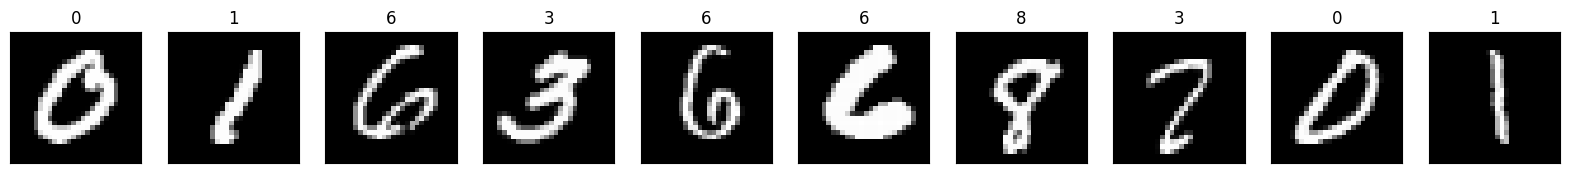

In [ ]:
# Vamos fazer umas previsões usando o nosso modelo treinado
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Mostra algumas previsões usando os dados de teste
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))

for i in range(10):
  random_num = np.random.choice(len(X_test))
  axes[i].set_title(predictions[random_num])
  axes[i].imshow(X_test[random_num], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

---
Por fim, uma outra forma de visualizar os dados é através da matriz de confusão. Ela basicamente nos mostra os dígitos que foram classificados errados. Para gerar a matriz de confusão estamos utilizando o `seaborn`.

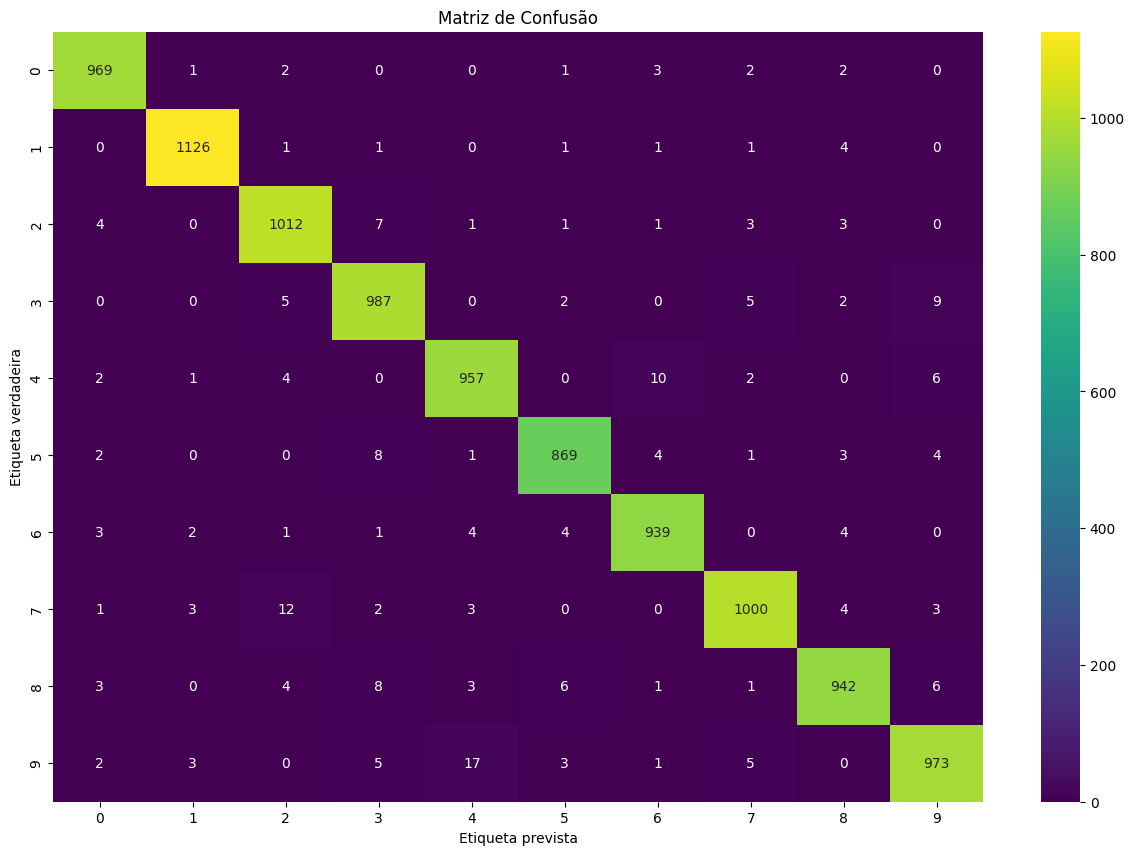

In [ ]:
# Gera a matriz de confusão
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), predictions)

# Plota a matriz de confusão
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Etiqueta prevista")
ax.set_ylabel("Etiqueta verdadeira")
ax.set_title("Matriz de Confusão");